# Neuroscience, Learning, Memory, Cognition Course
## Sharif University of Technology


In [ ]:
#@title Enter your information & "RUN the cell!!"
student_id =  99102156 #@param {type:"integer"}
student_name = "Arsham Lolohari" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 99102156
your name: Arsham Lolohari


##Exercise Outline : 
In this excercise we will get familiar with real neural data.
The Steinmetz dataset contains 39 Neuropixels recordings of 400-700 neurons each from across the mouse brain during a visual behavior task.
Please watch this [Youtube](https://www.youtube.com/watch?v=RUSJAJw1B6U) video about the dataset and describe the dataset briefly in your report.
it is not necessory to watch the video completely you can just watch its first 15 minutes.  
*`10 Points`*

## Import necessary packages 


In [46]:
import numpy as np
import pickle
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')

from pylab import *
##################################
# add all necessary packages here
##################################


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load the given dataset (This is not the full dataset, it includes recorded neurons from visual cortex)
load the data into "dat" using google drive like below or any other methods. *`3 Points`* 

In [47]:
with open('/content/drive/MyDrive/Visual_Cortex_Stinmetz_Dataset.p', 'rb') as fp:
    dat = pickle.load(fp)

## Help Functions. You can use these functions to inspect the dataset


* `dat['mouse_name']`: mouse name
* `dat['date_exp']`: when a session was performed
* `dat['spks']`: neurons by trials by time bins.    
* `dat['brain_area']`: brain area for each neuron recorded. 
* `dat['ccf']`: Allen Institute brain atlas coordinates for each neuron. 
* `dat['ccf_axes']`: axes names for the Allen CCF. 
* `dat['contrast_right']`: contrast level for the right stimulus, which is always contralateral to the recorded brain areas.
* `dat['contrast_left']`: contrast level for left stimulus. 
* `dat['gocue']`: when the go cue sound was played. 
* `dat['response_time']`: when the response was registered, which has to be after the go cue. The mouse can turn the wheel before the go cue (and nearly always does!), but the stimulus on the screen won't move before the go cue.  
* `dat['response']`: which side the response was (`-1`, `0`, `1`). When the right-side stimulus had higher contrast, the correct choice was `-1`. `0` is a no go response. 
* `dat['feedback_time']`: when feedback was provided. 
* `dat['feedback_type']`: if the feedback was positive (`+1`, reward) or negative (`-1`, white noise burst).  
* `dat['wheel']`: turning speed of the wheel that the mice uses to make a response, sampled at `10ms`. 
* `dat['pupil']`: pupil area  (noisy, because pupil is very small) + pupil horizontal and vertical position.
* `dat['face']`: average face motion energy from a video camera. 
* `dat['licks']`: lick detections, 0 or 1.   
* `dat['trough_to_peak']`: measures the width of the action potential waveform for each neuron. Widths `<=10` samples are "putative fast spiking neurons". 
* `dat['%X%_passive']`: same as above for `X` = {`spks`, `pupil`, `wheel`, `contrast_left`, `contrast_right`} but for  passive trials at the end of the recording when the mouse was no longer engaged and stopped making responses. 
* `dat['prev_reward']`: time of the feedback (reward/white noise) on the previous trial in relation to the current stimulus time. 
* `dat['reaction_time']`: ntrials by 2. First column: reaction time computed from the wheel movement as the first sample above `5` ticks/10ms bin. Second column: direction of the wheel movement (`0` = no move detected).  



What was the mouse name?  😬🐭*`1 Points`*


In [48]:
#"Lederberg" was the mouse name:
print(dat['mouse_name'] )

Lederberg


## Raster plot

Define trial types:

In [49]:
response = dat['response']  # right - nogo - left (-1, 0, 1)
response

array([ 0.,  1.,  0.,  1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1.,
        0., -1.,  0.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1.,  0.,
        1.,  1., -1.,  0.,  1., -1.,  0.,  0., -1., -1., -1.,  1.,  1.,
        1., -1.,  0.,  1., -1., -1.,  1.,  1., -1.,  1., -1., -1.,  1.,
       -1., -1., -1.,  1.,  1., -1., -1., -1.,  0.,  0., -1.,  1.,  0.,
       -1., -1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  1., -1.,  1.,
       -1.,  1.,  1.,  1., -1.,  0.,  1., -1., -1.,  0.,  1.,  1., -1.,
        1., -1.,  1., -1., -1.,  0., -1.,  1.,  0., -1., -1., -1.,  1.,
        1., -1.,  0.,  1.,  1.,  1.,  1., -1.,  0.,  1., -1.,  1.,  0.,
        0., -1., -1., -1., -1.,  0.,  1.,  0.,  0.,  1., -1., -1.,  0.,
       -1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  0.,  1., -1.,
       -1.,  1.,  1., -1.,  0., -1., -1.,  0.,  1.,  1.,  0.,  0.,  1.,
        0.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1., -1., -1., -1.,  0., -1.,  1.,  0., -1., -1

Count number of right, NoGo, Left trials?
*`6 Points`*





In [50]:
dt = dat['bin_size']  # binning at 10 ms
neurons_num = len(dat['spks'])
NT = len(dat['spks'][0]) # number of trials
bins_num = len(dat['spks'][0][0])

print("Number of neurons = "+str(neurons_num))
print("Number of trials = "+str(NT))
print("Number of time bins = "+str(bins_num))
##############################################################################
# TODO for students: Fill in the missing code and remove the error
right_trial_num = 0
left_trial_num = 0
NoGo_trial_num = 0
for i in range(len(response)):
  if response[i] == -1:
    right_trial_num = right_trial_num + 1
  elif response[i] == 1:
    left_trial_num = left_trial_num + 1
  elif response[i] == 0:
    NoGo_trial_num = NoGo_trial_num + 1

print("Number of right trials = "+str(right_trial_num) + ", Number of left trials = " + str(left_trial_num) + ", Number of NoGo trials = " + str(NoGo_trial_num))
##############################################################################

Number of neurons = 698
Number of trials = 340
Number of time bins = 250
Number of right trials = 141, Number of left trials = 135, Number of NoGo trials = 64


Please separate data of different trial types as described below and raster plot the spike_time/neuron for right, NoGo, Left for a trial. 
*`20 Points`*

You should generate figures like below:
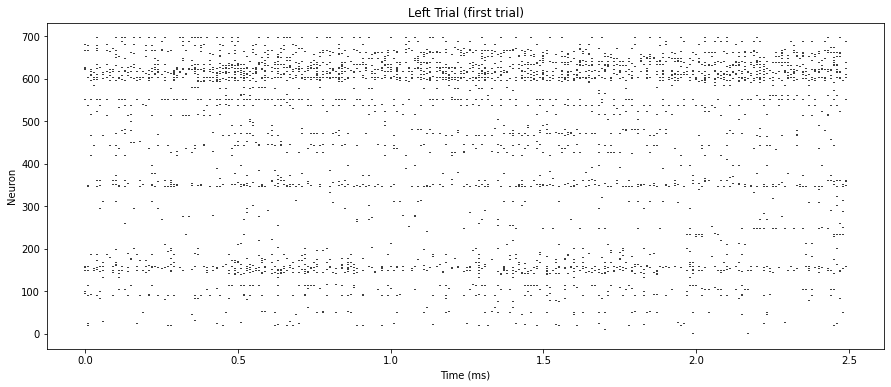

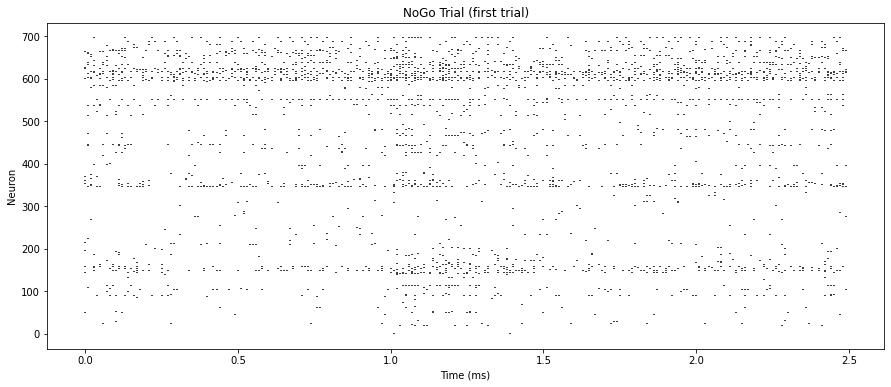

Raster plot other trials, is there a similar pattern in same trial types? in which neurons? which location? describe it in your report. 

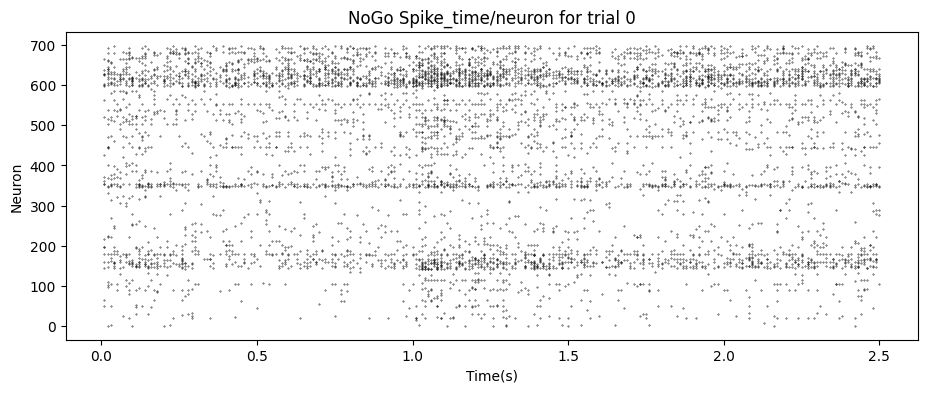

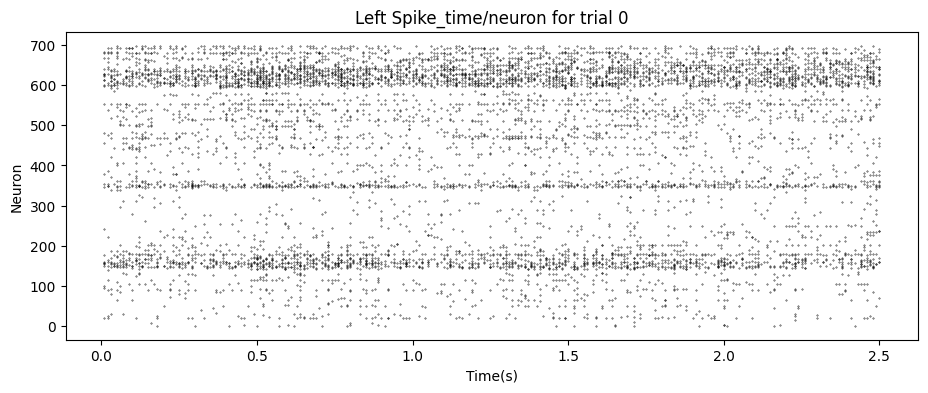

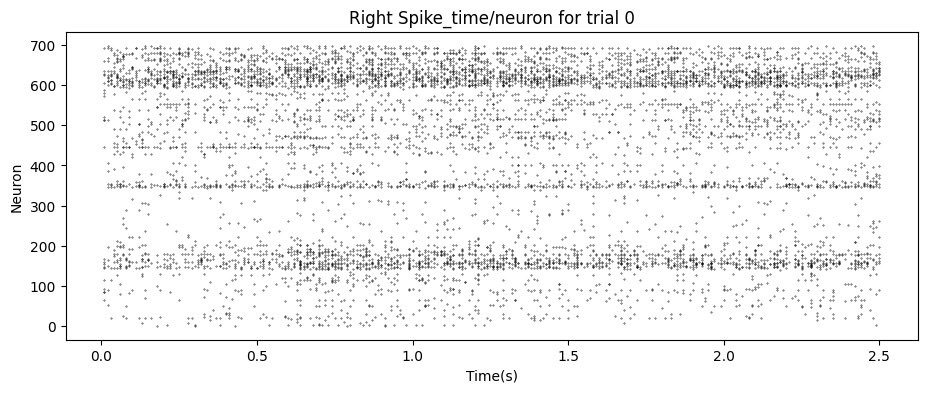

In [51]:
NoGo_trial = dat['spks'][:, response == 0,:]
Left_trial = dat['spks'][:, response == 1,:]
Right_trial = dat['spks'][:, response == -1,:]

NoGo_trials = np.where(response == 0)[0]
Left_trials = np.where(response == 1)[0]
Right_trials = np.where(response == -1)[0]




##############################################################################
# TODO for students: Fill in the missing code and remove the error

def plot_spikeTime(slct_trial,NoGo_trial,Left_trial,Right_trial):
  NoGo_x_arr = []
  NoGo_y_arr = []

  left_x_arr = []
  left_y_arr = []

  right_x_arr = []
  right_y_arr = []

  slct_NoGo_data = NoGo_trial[:,slct_trial,:]
  slct_left_data = Left_trial[:,slct_trial,:]
  slct_right_data = Right_trial[:,slct_trial,:]

  for i in range(neurons_num):
    for j in range(bins_num):
      time = (j+1)*dt
      if slct_NoGo_data[i,j] != 0:
        NoGo_x_arr = np.concatenate((NoGo_x_arr,time),axis = None)
        NoGo_y_arr = np.concatenate((NoGo_y_arr,i+1),axis = None)

      if slct_left_data[i,j] != 0:
        left_x_arr = np.concatenate((left_x_arr,time),axis = None)
        left_y_arr = np.concatenate((left_y_arr,i+1),axis = None)

      if slct_right_data[i,j] != 0:
        right_x_arr = np.concatenate((right_x_arr,time),axis = None)
        right_y_arr = np.concatenate((right_y_arr,i+1),axis = None)


  figure(figsize = (11,4))
  plt.scatter(NoGo_x_arr,NoGo_y_arr,s=0.1, c='black')
  plt.title("NoGo Spike_time/neuron for trial " + str(slct_trial))
  plt.xlabel('Time(s)')
  plt.ylabel('Neuron')

  figure(figsize = (11,4))
  plt.scatter(left_x_arr,left_y_arr,s=0.1, c='black')
  plt.title("Left Spike_time/neuron for trial " + str(slct_trial))
  plt.xlabel('Time(s)')
  plt.ylabel('Neuron')


  figure(figsize = (11,4))
  plt.scatter(right_x_arr,right_y_arr,s=0.1, c='black')
  plt.title("Right Spike_time/neuron for trial " + str(slct_trial))
  plt.xlabel('Time(s)')
  plt.ylabel('Neuron')


##############################################################################
plot_spikeTime(0,NoGo_trial,Left_trial,Right_trial)

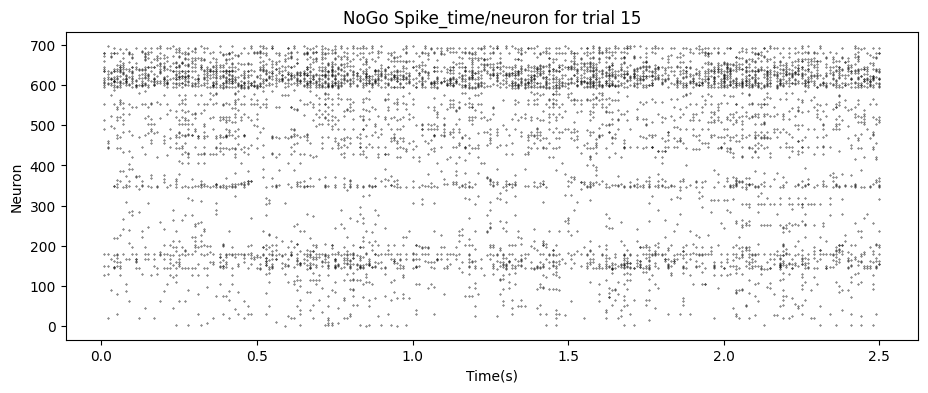

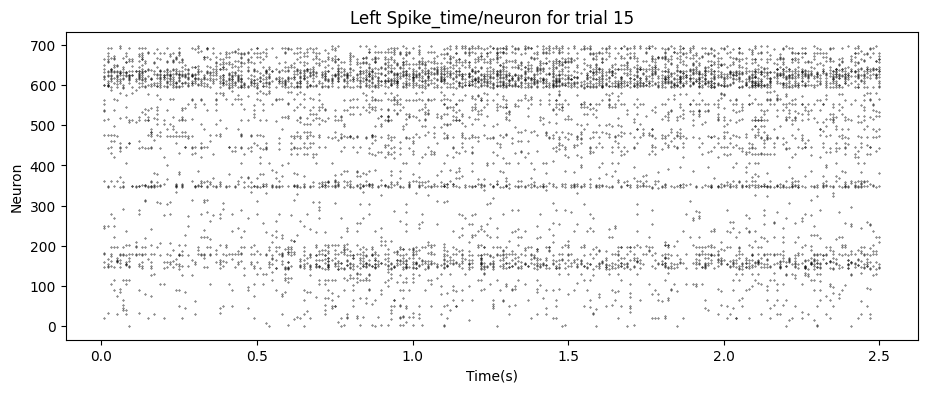

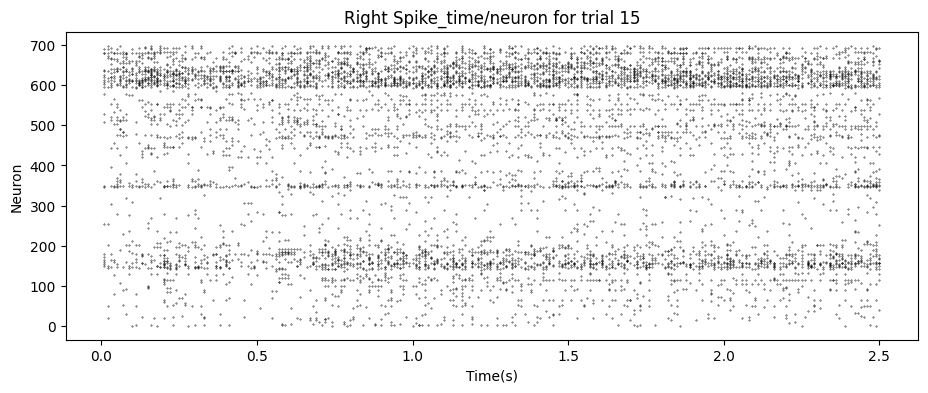

In [52]:
#Plotting for some other trials:
plot_spikeTime(15 ,NoGo_trial,Left_trial,Right_trial)


## Basic population average

Plot average of firing rate across all neurons and trials through time. compare left/right response with left/right stimulus. Mind the contrast level in your computations. describe results in your reports
*`15 Points`*

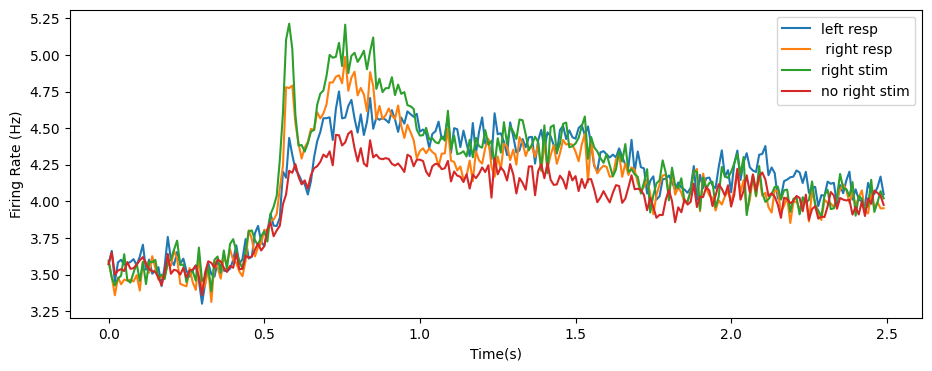

In [53]:
dt = dat['bin_size']  # binning at 10 ms
neurons_num = len(dat['spks'])
NT = len(dat['spks'][0]) # number of trials
bins_num = len(dat['spks'][0][0])

response = dat['response']  # right - nogo - left (-1, 0, 1)
vis_right = dat['contrast_right']  # 0 - low - high
vis_left = dat['contrast_left']  # 0 - low - high

NoGo_trial = dat['spks'][:, response == 0,:]
Left_trial = dat['spks'][:, response == 1,:]
Right_trial = dat['spks'][:, response == -1,:]

NoGo_trials = np.where(response == 0)[0]
Left_trials = np.where(response == 1)[0]
Right_trials = np.where(response == -1)[0]

mean_NoGo_trial = NoGo_trial.mean(axis=0).mean(axis=0) #dimension = 1*timeBins
mean_Left_trial = Left_trial.mean(axis=0).mean(axis=0) #dimension = 1*timeBins
mean_Right_trial = Right_trial.mean(axis=0).mean(axis=0) #dimension = 1*timeBins





NoGoStim_trial = dat['spks'][:, dat['contrast_left'] == dat['contrast_right'],:]
LeftStim_trial = dat['spks'][:, dat['contrast_left'] > dat['contrast_right'],:]
RightStim_trial = dat['spks'][:,  dat['contrast_left'] < dat['contrast_right'],:]
noRightStim_trial = dat['spks'][:,  dat['contrast_left'] >= dat['contrast_right'],:]


mean_NoGoStim_trial = NoGoStim_trial.mean(axis=0).mean(axis=0) #dimension = 1*timeBins
mean_LeftStim_trial = LeftStim_trial.mean(axis=0).mean(axis=0) #dimension = 1*timeBins
mean_RightStim_trial = RightStim_trial.mean(axis=0).mean(axis=0) #dimension = 1*timeBins
mean_noRightStim_trial = noRightStim_trial.mean(axis=0).mean(axis=0) #dimension = 1*timeBins


t_arr = np.arange(0,bins_num*dt,dt)
figure(figsize = (11,4))
plt.plot(t_arr,mean_Left_trial/dt)
plt.plot(t_arr,mean_Right_trial/dt)
plt.plot(t_arr,mean_RightStim_trial/dt)
plt.plot(t_arr,mean_noRightStim_trial/dt)
plt.title("")
plt.xlabel('Time(s)')
plt.ylabel('Firing Rate (Hz)')
plt.legend(['left resp', ' right resp' , 'right stim' , 'no right stim'])
plt.show()



##############################################################################
# TODO for students: Fill in the missing code (...) and remove the error
##############################################################################

You have to genereate figures like this:

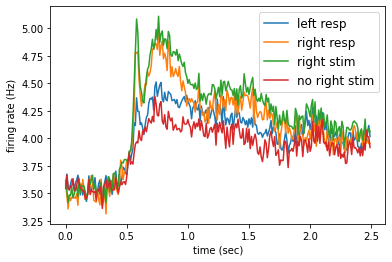

## The Peri-Stimulus Time Histogram (PSTH)
Along with raster plots, another common way of visualizing spike train data is the peri-stimulus time histogram (PSTH). As the name implies, this is a histogram — a plot of the count of spikes at each time point in the spike trains. PSTHs are a useful tool in aggregating the data across trials. As biological entities, neurons are complex and do not always spike at exactly the same time, or rate, every time they are stimulated. This is why we collect data over many trials — to identify the average pattern of responding. By summing the number of spikes in short time bins, PSTHs allow us to visualize when the neuron is most likely to spike.

Please plot the PSTH for different stimulus types (Left, Right and NoGo). you can plot the PSTH across trials or Neurons. discuss result in your report. we have illustrated some figures below to give you hint.
*`15 Points`*

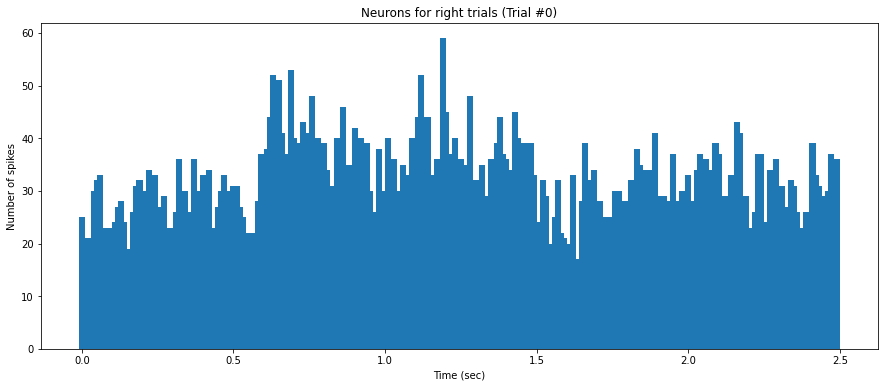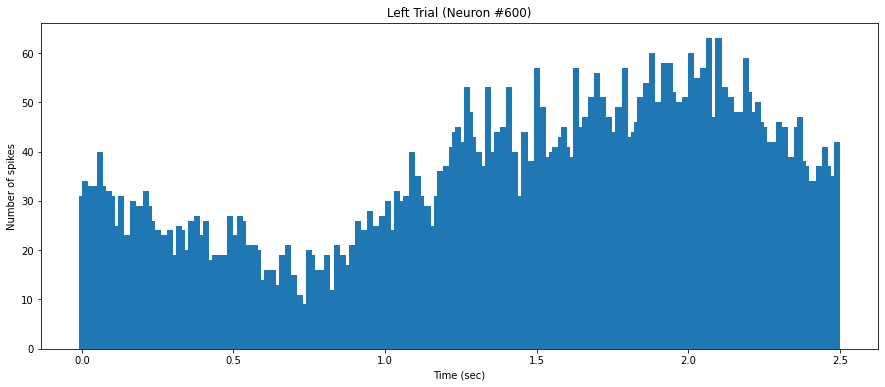

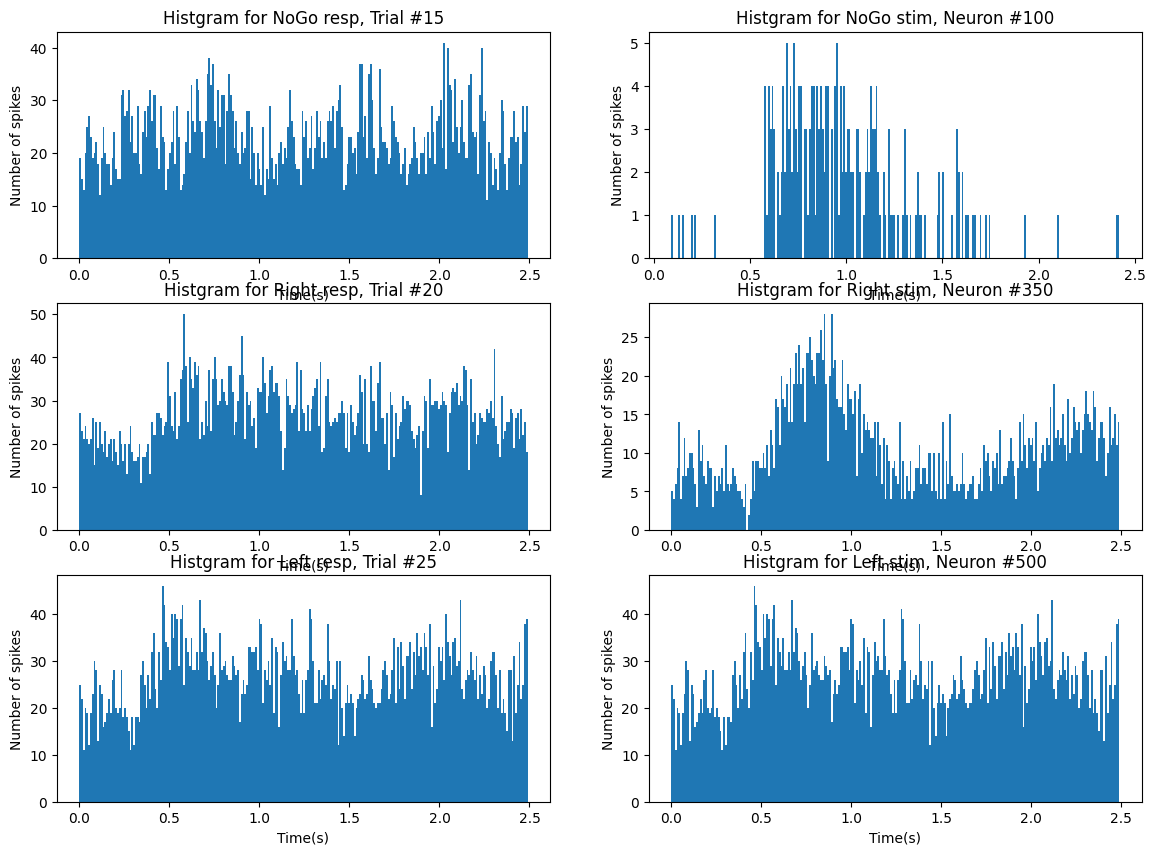

In [54]:




##############################################################################
# TODO for students: Fill in the missing code and remove the error

def singleTrialHist(slct_data, slct_trial):
  t_arr = np.arange(0,bins_num*dt,dt)
  spikeTimes_arr = []
  for i in range(neurons_num):
    for j in range(len(t_arr)):
      if slct_data[i,slct_trial,j] == 1:
        spikeTimes_arr = np.append(spikeTimes_arr,t_arr[j])
  return spikeTimes_arr


def singleNeuronHist(slct_data, slct_neuron):
  trials_num = len(slct_data[0])
  t_arr = np.arange(0,bins_num*dt,dt)
  spikeTimes_arr = []
  for i in range(trials_num):
    for j in range(len(t_arr)):
      if slct_data[slct_neuron,i,j] == 1:
        spikeTimes_arr = np.append(spikeTimes_arr,t_arr[j])
  return spikeTimes_arr




NoGo_trial = dat['spks'][:, response == 0,:]
Left_trial = dat['spks'][:, response == 1,:]
Right_trial = dat['spks'][:, response == -1,:]

NoGo_trials = np.where(response == 0)[0]
Left_trials = np.where(response == 1)[0]
Right_trials = np.where(response == -1)[0]


NoGoStim_trial = dat['spks'][:, dat['contrast_left'] == dat['contrast_right'],:]
LeftStim_trial = dat['spks'][:, dat['contrast_left'] > dat['contrast_right'],:]
RightStim_trial = dat['spks'][:,  dat['contrast_left'] < dat['contrast_right'],:]
noRightStim_trial = dat['spks'][:,  dat['contrast_left'] >= dat['contrast_right'],:]


#for single trial hist:
slct_data = NoGo_trial
slct_trial1 = 15
NoGo_hist_data = singleTrialHist(slct_data, slct_trial1)

slct_data = Right_trial
slct_trial2 = 20
Right_hist_data = singleTrialHist(slct_data, slct_trial2)

slct_data = Left_trial
slct_trial3 = 25
Left_hist_data = singleTrialHist(slct_data, slct_trial3)

#For single neuron hist:
slct_data = NoGoStim_trial
slct_neuron1 = 100
NoGoStim_hist_data = singleNeuronHist(slct_data, slct_neuron1)

slct_data = RightStim_trial
slct_neuron2 = 350
RightStim_hist_data = singleNeuronHist(slct_data, slct_neuron2)

slct_data = LeftStim_trial
slct_neuron3 = 500
LeftStim_hist_data = singleNeuronHist(slct_data, slct_neuron3)



figure(figsize = (14,10))
subplot(3,2,1)
plt.hist(NoGo_hist_data, bins_num)
plt.title("Histgram for NoGo resp, Trial #" + str(slct_trial1))
plt.xlabel('Time(s)')
plt.ylabel('Number of spikes')

subplot(3,2,3)
plt.hist(Right_hist_data, bins_num)
plt.title("Histgram for Right resp, Trial #" + str(slct_trial2))
plt.xlabel('Time(s)')
plt.ylabel('Number of spikes')

subplot(3,2,5)
plt.hist(Left_hist_data, bins_num)
plt.title("Histgram for Left resp, Trial #" + str(slct_trial3))
plt.xlabel('Time(s)')
plt.ylabel('Number of spikes')


subplot(3,2,2)
plt.hist(NoGoStim_hist_data, bins_num)
plt.title("Histgram for NoGo stim, Neuron #" + str(slct_neuron1))
plt.xlabel('Time(s)')
plt.ylabel('Number of spikes')


subplot(3,2,4)
plt.hist(RightStim_hist_data, bins_num)
plt.title("Histgram for Right stim, Neuron #" + str(slct_neuron2))
plt.xlabel('Time(s)')
plt.ylabel('Number of spikes')


subplot(3,2,6)
plt.hist(Left_hist_data, bins_num)
plt.title("Histgram for Left stim, Neuron #" + str(slct_neuron3))
plt.xlabel('Time(s)')
plt.ylabel('Number of spikes')


plt.show()


##############################################################################

## Inter-spike intervals and their distributions
Given the ordered arrays of spike times for each neuron in spike_times, which we’ve just visualized, what can we ask next?
Scientific questions are informed by existing models. So, what knowledge do we already have that can inform questions about this data?

We know that there are physical constraints on neuron spiking. Spiking costs energy, which the neuron’s cellular machinery can only obtain at a finite rate. Therefore neurons should have a refractory period: they can only fire as quickly as their metabolic processes can support, and there is a minimum delay between consecutive spikes of the same neuron.

More generally, we can ask “how long does a neuron wait to spike again?” or “what is the longest a neuron will wait?” Can we transform spike times into something else, to address questions like these more directly?

We can consider the inter-spike times (or interspike intervals: ISIs). These are simply the time differences between consecutive spikes of the same neuron.

Plot the distribution of ISIs for a single neuron
Exercise objective: make a histogram, like we did for spike counts, to show the distribution of ISIs for one of the neurons in the dataset.

Do this in three steps:

Extract the spike times for one of the neurons

1.   Extract the spike times for one of the neurons
2.   Compute the ISIs (the amount of time between spikes, or equivalently, the difference between adjacent spike times)

1.   Plot a histogram with the array of individual ISIs



Plot a histogram with the array of individual ISIs. Remember the tutorial about modeling 
*`15 Points`*


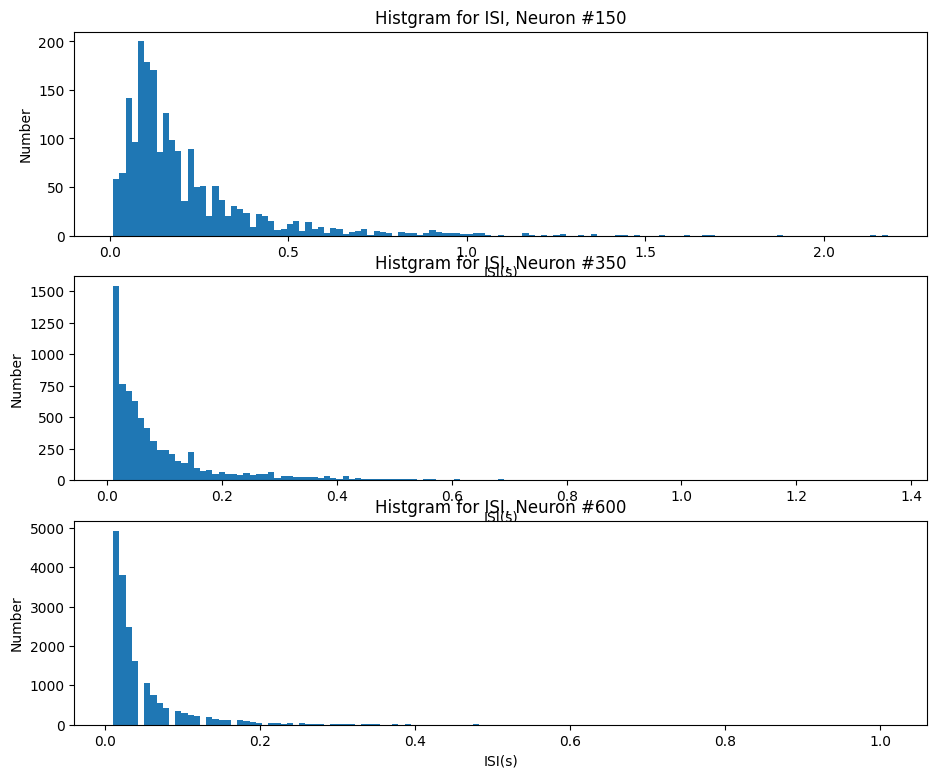

In [56]:
##############################################################################
# TODO for students: Fill in the missing code and remove the error

def ISI_singleNeuronHist(slct_data, slct_neuron):
  trials_num = len(slct_data[0])
  t_arr = np.arange(0,bins_num*dt,dt)
  spikeTimes_arr = []
  ISI_arr = []
  for i in range(trials_num):
    for j in range(len(t_arr)):
      if slct_data[slct_neuron,i,j] == 1:
        spikeTimes_arr = np.append(spikeTimes_arr,t_arr[j])
    ISI_arr = np.append(ISI_arr,np.diff(spikeTimes_arr))
    spikeTimes_arr = []
  return ISI_arr 

slct_neuron_arr = np.array([150, 350, 600])
slct_data = dat['spks']
# spikeTimes = singleNeuronHist(slct_data, slct_neuron)
# ISI = np.diff(spikeTimes)

plots_num = len(slct_neuron_arr)
figure(figsize = (11,plots_num*3))

for i in range(plots_num):
  slct_neuron = slct_neuron_arr[i]
  ISI = ISI_singleNeuronHist(slct_data, slct_neuron)

  subplot(plots_num,1,i+1)
  plt.hist(ISI, round(bins_num/2))
  plt.title("Histgram for ISI, Neuron #" + str(slct_neuron))
  plt.xlabel('ISI(s)')
  plt.ylabel('Number')

plt.show()

##############################################################################


## Behavioral data
plot the behavioral data (pupil) for different stimulus types (pupil area is noisy because it's very small). what does pupil dialation represent? how? discuss in your report. Is there any correlation between behavioral data and neuronal spikes?
*`15 Points`* 
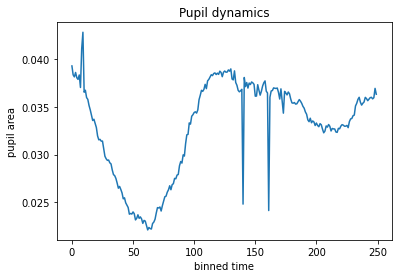

Text(0, 0.5, 'Pupil area')

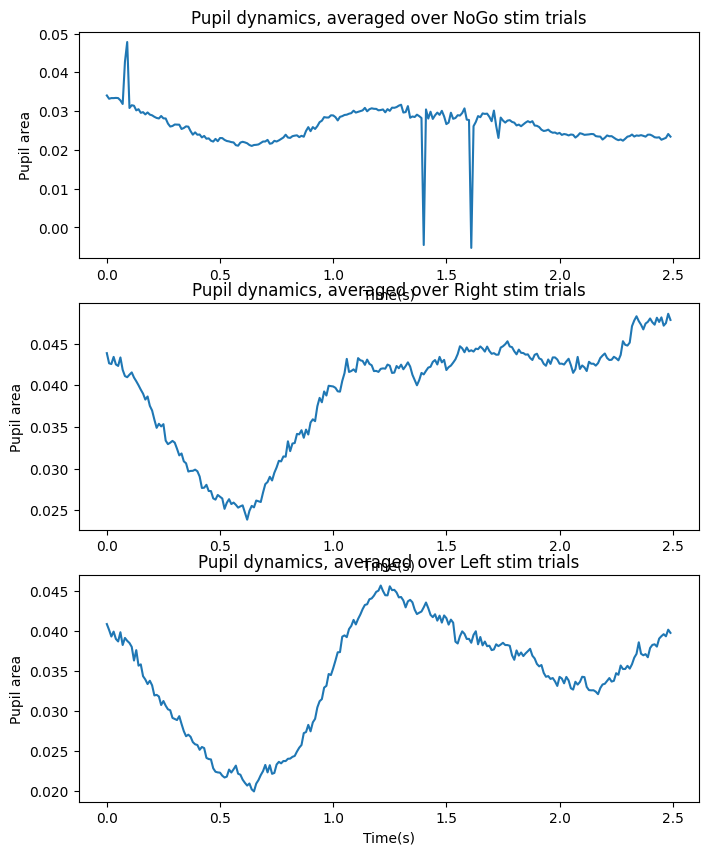

In [58]:
##############################################################################
# TODO for students: Fill in the missing code and remove the error


pupil_NoGoStim_trial = dat['pupil'][0, dat['contrast_left'] == dat['contrast_right'],:]
pupil_LeftStim_trial = dat['pupil'][0, dat['contrast_left'] > dat['contrast_right'],:]
pupil_RightStim_trial = dat['pupil'][0,  dat['contrast_left'] < dat['contrast_right'],:]


t_arr = np.arange(0,bins_num*dt,dt)

figure(figsize = (8,10))
subplot(3,1,1)
plt.plot(t_arr, pupil_NoGoStim_trial.mean(axis = 0))
plt.title("Pupil dynamics, averaged over NoGo stim trials")
plt.xlabel('Time(s)')
plt.ylabel('Pupil area')

subplot(3,1,2)
plt.plot(t_arr, pupil_RightStim_trial.mean(axis = 0))
plt.title("Pupil dynamics, averaged over Right stim trials")
plt.xlabel('Time(s)')
plt.ylabel('Pupil area')


subplot(3,1,3)
plt.plot(t_arr, pupil_LeftStim_trial.mean(axis = 0))
plt.title("Pupil dynamics, averaged over Left stim trials")
plt.xlabel('Time(s)')
plt.ylabel('Pupil area')
##############################################################################

## **Bonus (Extra)**:  *`+10 points`*
Load the entire dataset with given codes and select another recordings (except num = 11 which was given above).
Analyse the loaded data using what you learned above and describe it precisely in your report. 


## Loading of Steinmetz data (complete dataset - about 1 gigabyte)


In [ ]:
# @title Data retrieval
import os, requests

fname = ['steinmetz_st.npz']
fname.append('steinmetz_wav.npz')
fname.append('steinmetz_lfp.npz')

url = ["https://osf.io/4bjns/download"]
url.append("https://osf.io/ugm9v/download")
url.append("https://osf.io/kx3v9/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)

In [ ]:
# @title Data loading

dat_LFP = np.load('steinmetz_lfp.npz', allow_pickle=True)['dat']
dat_WAV = np.load('steinmetz_wav.npz', allow_pickle=True)['dat']
dat_ST = np.load('steinmetz_st.npz', allow_pickle=True)['dat']

# select just one of the recordings here.
num = ??
dat = dat_LFP[num]
print(dat.keys())
dat = dat_WAV[num]
print(dat.keys())
dat = dat_ST[num]
print(dat.keys())